**COMS E6998.015 - PRAC DEEP LEARNING SYS - Fall 2024**

*Homework 1 Solutions || Submitted By: Vaibhaw K Shende, **vks2116** @ columbia.edu*

**Solution to Problem 4 - Convolutional Neural Networks Architectures**

**Part 1 : VGG19 Architechture**

The Table 1 is completed below by calculating the output activation size after each layer and calculating the number of parameters using the filter sizes and input-output dimensions.

**Table 1: VGG19 memory and weights**

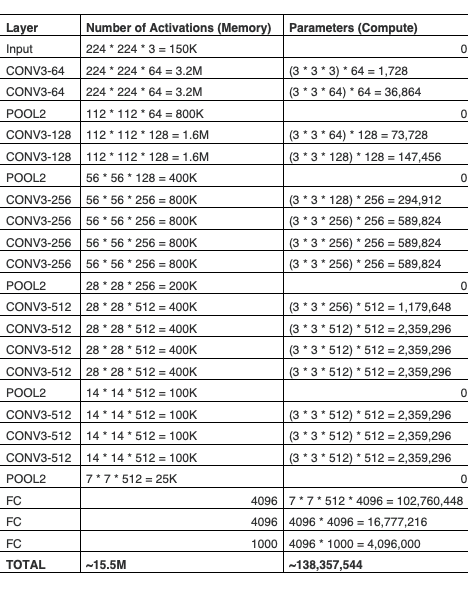

**Part 2 : Googlenet Inception Implementation**

*(a) Inception Module Design:*

The general idea behind designing the inception module is to overcome the drawbacks of increasing network size leading to dramatic increase of computational resources. The inception design makes the network more efficient by reducing the number of parameters while still capturing essential features.
The inception module allows a convolutional neural network to capture spatial features at multiple scales within the same module by using parallel convolutions with different filter sizes (e.g., 1x1, 3x3, and 5x5 filters) and a pooling layer. The resulting outputs are concatenated along the channel dimension to form a combined output. The objectives achieved with inception model are:
* Multi-scale Feature Extraction: Different filter sizes capture patterns and features of varying granularity, enabling the network to learn both fine and coarse details simultaneously.
* Dimensionality Reduction: 1x1 convolutions ( or bottleneck layer ) are used for reducing the number of channels before larger convolutions (3x3, 5x5), thereby decreasing computational cost.
* Feature Diversity: Combining different feature maps improves the network ability to generalize and detect complex patterns without significantly increasing computational overhead.


*(b) Output Size Calculation:*


**Naive version:** filters as give below..

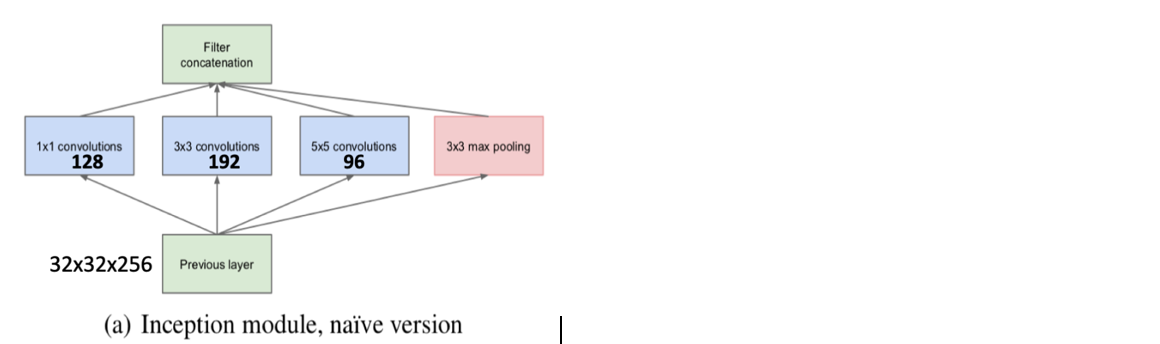


Each branch in this module outputs feature maps with the same spatial dimensions because  the $1x1$, $3x3$, and $5x5$ convolutions have "same" padding, which means the output size remains $32x32$. The max pooling uses a $3x3$ filter with stride 1 and "same" padding, ensuring the output size is also $32x32$.

**Input**
32x32x256
**Filters:**
* $1x1$ Convolution: 128 filters
* $3x3$ Convolution: 192 filters
* $5x5$ Convolution: 96 filters
* $3x3$ Max Pooling: Typically, a 1x1 convolution is applied after max pooling (to reduce depth), and in this diagram, the depth after pooling is 256.

**Output Dimensions:**
* $128+192+96+256=672$ channels

**Output Size:**
* $32x32x672$

**Dimensionality Reduction Version:** filter as given below ..
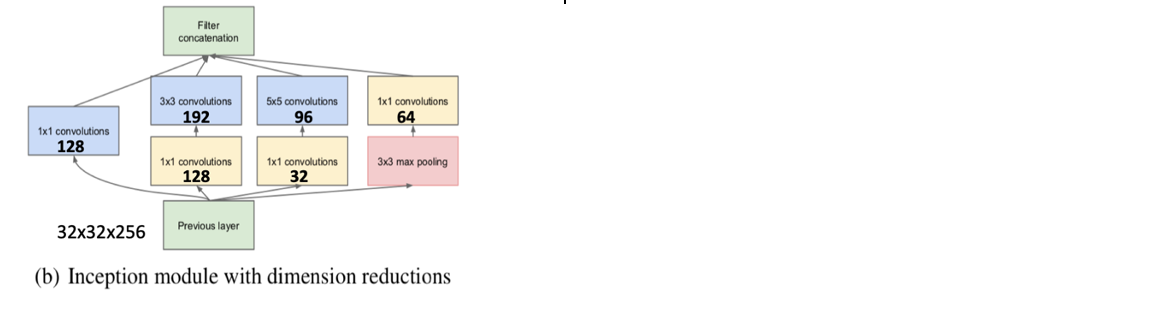

Each branch in this module still outputs feature maps with the same spatial dimensions $(32x32)$ due to "same" padding.

**Input**
32x32x256
**Filters:**
* 1x1 Convolution:128 filters
* 3x3 Convolution:192 filters (applied after a 1x1 reduction layer with 128 filters)
* 5x5 Convolution: 96 filters (applied after a 1x1 reduction layer with 32 filters)
* 3x3 Max Pooling: After max pooling, there is a 1x1 convolution with 64 filters.

**Output Dimensions:**
* $128+192+96+64=480$ channels

**Output Size:**
* $32x32x480$

(c) Number of Convolutional Operations:

The total number of convolution operations is given by the formula below ..

**Operations $=$ (Kernel Size) x Input Channels x Output Channels x Spatial Size**

The calculations for NAive version and Dimension reduction version are given below..

**Naive version:**

* 1x1 Convolution Branch:

>Input Dimensions: 32 x 3 x 256

>Number of Filters: 128

>Number of Operations: 1 x 1 x 256 x 128 x 32 x 32=33,554,432 operations

* 3x3 Convolution Branch:

> Input Dimensions: 32 x 32 x 256
> Number of Filters: 192

> Number of Operations: 3 x 3 x 256 x 192 x 32 x 32 =169,869,312 operations

* 5x5 Convolution Branch:

>Input Dimensions: 32 x 32 x 256
>Number of Filters: 96
>Number of Operations:5 x 5 x 256 x 96 x 32 x 32 = 98,304,000 operations

* 3x3 Max Pooling + 1x1 Convolution Branch:

>Max Pooling does not add to the convolutional operations.
>1x1 Convolution after Pooling:
>Input Dimensions: 32 x 32 x 256
>Number of Filters: 256
>Number of Operations:1 x 1 x 256 x 256 x 32 x 32 = 67,108,864 operations

**Total Convolutional Operations: 33,554,432 + 169,869,312 + 98,304,000 + 67,108,864 = 368,836,608 operations**



**Dimension Reduction version:**

* 1x1 Convolution Branch:

>Input Dimensions:32 x 32 x 256

>Number of Filters: 128

>Number of Operations: 1 x 1 x 256 x 128 x 32 x 32 = 33,554,432 operations

* 3x3 Convolution Branch (with 1x1 Reduction):

>1x1 Reduction:

>>Input Dimensions: 32 x 32 x 256

>>Number of Filters: 128

>Number of Operations:1 x 1 x 256 x 128 x 32 x 32 = 33,554,432 operations

>3x3 Convolution:

>>Input Dimensions: 32 x 32 x 128

>>Number of Filters: 192

>>Number of Operations: 3 x 3 x 128 x 192 x 32 x 32 = 113,246,208 operations

>Total for this Branch: 33,554,432+113,246,208=146,800,640 operations

* 5x5 Convolution Branch (with 1x1 Reduction):

>1x1 Reduction:

>>Input Dimensions:32 x 32 x 256

>>Number of Filters: 32

>>Number of Operations:1 x 1 x 256 x 32 x 32 x 32 = 8,388,608 operations

>5x5 Convolution:

>>Input Dimensions:32 x 32 x 32
>>Number of Filters: 96

>>Number of Operations:5 x 5 x 32 x 96 x 32 x 32 = 39,321,600 operations

>Total for this Branch:8,388,608+39,321,600=47,710,208 operations

* 3x3 Max Pooling + 1x1 Convolution Branch:

>1x1 Convolution after Pooling:

>Input Dimensions:32 x 32 x 256

>Number of Filters: 64

>Number of Operations:1 x 1 x 256 x 64 x 32 x 32=16,777,216operations

**Total Convolutional Operations : 33,554,432 + 146,800,640 + 47,710,208 + 16,777,216 = 244,842,496 operations**

*(d) Comparison of Computational Complexity:*

The naive Inception architecture has a significantly higher computational complexity due to the absence of dimensionality reduction before applying expensive convolutions (3x3 and 5x5). With a high number of parameters and computational complexity, there is a higher risk of overfitting.

The dimensionality reduction version addresses these issues by adding 1x1 convolutions before expensive operations like 3x3 and 5x5 convolutions. The Dimensionality Reduction Architecture helps in reducing the input channels by using 1x1 convolutions as a reduction step. This reduction in input size leads to a proportional decrease in the number of convolutional operations. Despite reducing the number of channels, the spatial dimensions (32x32) are preserved, ensuring that spatial patterns and relationships in the data are still captured effectively. The dimensionality reduction strategy allows the network to be deeper and more complex without a drastic increase in computational resources. This helps in better feature learning with a balanced number of parameters.

**Computational Savings in operations**

368,836,608 operations (with Naive network version)
 - 244,842,496 operations (with dimension reduction network architechture) = **123,994,112 operations**


 **Computational Savings in percentage terms**

$
\frac{123,994,112}{368,836,608}
\approx 33\%
$